# **Column Description**

**Transaction_ID:**
Unique identifier for each transaction

**Date:**	Date of the transaction

**Time:**	Time of the transaction

**Customer_ID:**	Unique identifier for the customer

**Merchant_ID:**	Unique identifier for the merchant

**Device_ID:**	Unique identifier for the device used for the transaction

**Payment_Gateway:**	Payment gateway used for the transaction (e.g., UPI Pay, Sigma Bank)

**Transaction_Type:**	Type of transaction (e.g., Bank Transfer, Subscription)

**Transaction_Amount_Deviation:**	Deviation of the transaction amount from the customer's average transaction amount

**Days_Since_Last_Transaction:**	Number of days since the customer's last transaction

**Transaction_Frequency:**	Frequency of transactions for the customer in a given period

**IP_Address:**	IP address of the device used for the transaction

**Transaction_City:**	City where the transaction originated

**Transaction_State:**	State where the transaction originated

**Transaction_Status:**	Status of the transaction (e.g., Completed, Failed)

**Transaction_Channel:**	Channel used for the transaction (e.g., Online, Mobile)

**Device_OS:**	Operating system of the device used for the transaction (e.g., Android, iOS)

**Merchant_Category:**	Category of the merchant (e.g., Retail, Food & Beverages)

**fraud:**	Indicator of whether the transaction is fraudulent (1 for fraudulent, 0 for non-fraudulent)

**Year:**	Year of the transaction extracted from the Date column

**Month:**	Month of the transaction extracted from the Date column

**amount**:	The amount of the transaction

# Importing Libraries

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt

# Data Collection

In [ ]:
# Import the dataset
df = pd.read_csv("/content/Copy of Sample_DATA.csv")

# Exploring Basic information of the data

In [ ]:
#Top 5 rows of the dataset
df.head(5)

,Transaction_ID,Date,Time,Merchant_ID,Customer_ID,Device_ID,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,IP_Address,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud
0,T00022452,20-04-2023,4:50:22 AM,f65a902b-2396-40cc-9593-97e103f1bc15,89aaeceb-21f5-46c8-9de3-89dde6a10a75,c1e0deb4-7c97-4178-a838-38f4a2f0b57c,Refund,SamplePay,Durgapur,Chhattisgarh,140.213.7.48,Completed,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1
1,T00032233,08-08-2023,8:09:21 AM,d4a5efcb-4eb6-4d3a-8132-07bb3e6e13a4,8a8962f9-e84a-4573-ab0b-187311978a21,62e14f64-b0ba-4284-889a-51ac05baf33e,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,184.108.177.45,Pending,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1
2,T00037364,25-06-2023,7:49:01 AM,759ad138-9473-4729-8699-3d72c7ffb983,c3f53ce6-e305-4460-a71d-93bde26043ab,4281c542-ac77-4269-b4bb-1de93ac12677,Bank Transfer,Other,New Delhi,Himachal Pradesh,16.106.248.163,Failed,Android,2,Utilities,Online,44.19,22,106.69,1
3,T00015924,28-01-2024,5:44:12 AM,d8f561e4-bded-4ef0-bcd8-5494b2e31a94,9f0c5613-7d4c-4454-bee1-c47fbba406a1,058b6488-2469-42f2-bc7f-707921d35cad,Subscription,UPI Pay,Bharatpur,Chhattisgarh,65.245.160.212,Failed,Android,0,Purchases,Online,-54.34,28,3611.11,1
4,T00021805,21-06-2023,9:40:59 AM,26fdd7a1-8537-4dfe-bcf7-f5a127b36682,bf9aa6d5-7d3d-43f9-8631-31336720a383,068ff12c-127a-4cfb-9899-ddde37060b28,Investment,Dummy Bank,Sagar,Mizoram,33.172.152.38,Completed,MacOS,1,Other,Online,12.38,25,374.89,1


In [ ]:
#Last 5 rows of the dataset
df.tail(5)

,Transaction_ID,Date,Time,Merchant_ID,Customer_ID,Device_ID,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,IP_Address,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud
642,T00026082,24-07-2023,3:12:04 AM,6696dc2b-d48e-4880-8845-e65aa1df8d7d,4ab8bcd6-295c-4ae5-b4f5-2f3182a969c8,a1f5d01e-a69f-404d-b2ce-6ff4bb17de62,Bill Payment,Gamma Bank,Hyderabad,Assam,34.163.43.64,Pending,iOS,4,Travel bookings,In-store,14.00,25,28.27,0
643,T00017272,05-07-2023,6:21:18 AM,f2af26ef-0e08-42f8-b6ed-eaab786f5bf6,6cd4af1c-6564-47eb-bcf9-cd44c45c0f2b,36d089dd-b74d-4157-ba29-823b85368169,Purchase,Other,Bangalore,Tripura,129.125.172.104,Pending,Windows,10,More Services,Mobile,-33.38,28,26.26,0
644,T00048923,16-04-2023,8:32:41 AM,c6ce37eb-332d-4e4f-995f-fba48d4dedb9,690bd64f-5c83-41b8-873a-57c9bc6bb132,668b172d-b1ab-438b-9650-358bc8d48494,Bill Payment,Other,Mumbai,Arunachal Pradesh,27.48.57.181,Failed,Android,1,More Services,Online,-44.37,19,6.02,0
645,T00022497,28-10-2023,9:33:42 AM,b8ac3703-52dc-4372-b59b-4f9b51a5a855,48b40bc8-a730-4420-9702-2beecca286f0,e18b7076-1718-475e-81de-9ff2c392d194,Bank Transfer,Bank of Data,Vijayawada,Madhya Pradesh,206.122.250.79,Failed,Windows,2,Investment,In-store,-57.29,12,17.12,0
646,T00032445,11-04-2024,10:48:14 AM,9d40b579-b71e-4d16-8917-fce4ecdf9183,108391b3-9545-49f8-be38-e356e64e8912,9a6daf2d-c57f-4dbd-ae2b-86d49a9d60e3,Bank Transfer,Dummy Bank,Ichalkaranji,Assam,165.92.164.116,Completed,iOS,2,Brand Vouchers and OTT,In-store,-11.94,26,50.60,0


# **Descriptive Data analysis**

In [ ]:
#information of the dataset data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_ID                647 non-null    object 
 1   Date                          647 non-null    object 
 2   Time                          647 non-null    object 
 3   Merchant_ID                   647 non-null    object 
 4   Customer_ID                   647 non-null    object 
 5   Device_ID                     647 non-null    object 
 6   Transaction_Type              647 non-null    object 
 7   Payment_Gateway               647 non-null    object 
 8   Transaction_City              647 non-null    object 
 9   Transaction_State             647 non-null    object 
 10  IP_Address                    647 non-null    object 
 11  Transaction_Status            647 non-null    object 
 12  Device_OS                     647 non-null    object 
 13  Trans

In [ ]:
#the number of rows and columns
df.shape

(647, 20)

In [ ]:
#Descriptive information of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction_Frequency,647.0,3.564142,6.454543,0.00,1.000,2.00,3.00,50.00
Transaction_Amount_Deviation,647.0,5.014668,56.375914,-99.47,-42.355,8.38,52.29,99.45
Days_Since_Last_Transaction,647.0,15.717156,8.218122,1.00,8.500,16.00,23.00,29.00
amount,647.0,128.839753,364.995747,0.12,17.155,35.00,74.77,4883.62
fraud,647.0,0.239567,0.427150,0.00,0.000,0.00,0.00,1.00


# Data Preparation & Cleaning the data

In [ ]:
#Checking for the null values
df.isnull().sum()

,0
Transaction_ID,0
Date,0
Time,0
Merchant_ID,0
Customer_ID,0
Device_ID,0
Transaction_Type,0
Payment_Gateway,0
Transaction_City,0
Transaction_State,0


In [ ]:
#Checking for duplicate values
df.duplicated().sum()

np.int64(0)

In [ ]:
#Changing the format of the date data
df["Date"] = pd.to_datetime(df["Date"]).astype('datetime64[ns]')

<ipython-input-11-e80a35fecab4>:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Date"] = pd.to_datetime(df["Date"]).astype('datetime64[ns]')


In [ ]:
print(df.head())

  Transaction_ID       Date        Time                           Merchant_ID  \
0      T00022452 2023-04-20  4:50:22 AM  f65a902b-2396-40cc-9593-97e103f1bc15   
1      T00032233 2023-08-08  8:09:21 AM  d4a5efcb-4eb6-4d3a-8132-07bb3e6e13a4   
2      T00037364 2023-06-25  7:49:01 AM  759ad138-9473-4729-8699-3d72c7ffb983   
3      T00015924 2024-01-28  5:44:12 AM  d8f561e4-bded-4ef0-bcd8-5494b2e31a94   
4      T00021805 2023-06-21  9:40:59 AM  26fdd7a1-8537-4dfe-bcf7-f5a127b36682   

                            Customer_ID                             Device_ID  \
0  89aaeceb-21f5-46c8-9de3-89dde6a10a75  c1e0deb4-7c97-4178-a838-38f4a2f0b57c   
1  8a8962f9-e84a-4573-ab0b-187311978a21  62e14f64-b0ba-4284-889a-51ac05baf33e   
2  c3f53ce6-e305-4460-a71d-93bde26043ab  4281c542-ac77-4269-b4bb-1de93ac12677   
3  9f0c5613-7d4c-4454-bee1-c47fbba406a1  058b6488-2469-42f2-bc7f-707921d35cad   
4  bf9aa6d5-7d3d-43f9-8631-31336720a383  068ff12c-127a-4cfb-9899-ddde37060b28   

  Transaction_Type Payment

# **Data Extraction**

In [ ]:
#Extracting the year
df["Year"]=pd.to_datetime(df["Date"]).dt.year

In [ ]:
#Extracting the Month
df["Month"]=pd.to_datetime(df["Date"]).dt.month

In [ ]:
#Mapping the month
months = {1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"}

In [ ]:
df["Month"]=df["Month"].map(months)

# **Dropping Unnecessary Columns**

In [ ]:
#Dropping Unnecessary Columns
df.drop(columns=["Transaction_ID","Date","Time","Merchant_ID","Customer_ID","Device_ID"],inplace=True)

In [ ]:
#Checking for fraud
df["fraud"].value_counts(normalize=True)*100


,proportion
fraud,
0,76.043277
1,23.956723


# **Data Visualization / Exploratory Data Analysis**

In [ ]:
#Using plotly to explore the fraud transaction count
plt.figure(figsize=(5,3))
fig = px.bar(x=df["fraud"].value_counts().index,
      y=df["fraud"].value_counts().values,
       color=df["fraud"].value_counts().index,
       labels={"x":'Fraudlent_Transactions',"y":"Count of fraud"},
       title="Fraud Visualization"
      )
fig.show()

<Figure size 500x300 with 0 Axes>

**Observation**
      
      - From the visualization, it's evident that the number of fraud transactions is significantly lower compared to non-fraudulent transactions.

     - The visual also highlights that the data is imbalanced.

In [ ]:
#Exploring the Payment_gateway with the fraud_transaction

df["Payment_Gateway"].value_counts()


,count
Payment_Gateway,
Sigma Bank,81
UPI Pay,77
Gamma Bank,74
Bank of Data,73
CReditPAY,72
Other,69
Alpha Bank,68
SamplePay,67
Dummy Bank,66


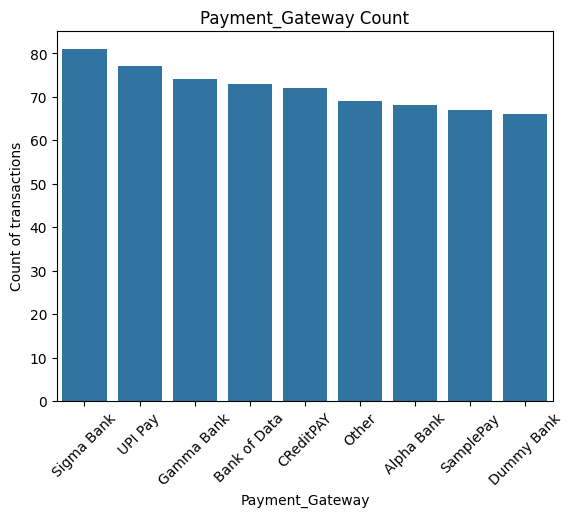

In [ ]:
sorted_values=df["Payment_Gateway"].value_counts()

sns.countplot(data=df,x="Payment_Gateway",order=sorted_values.index)
plt.xticks(rotation=45)
plt.xlabel("Payment_Gateway")
plt.ylabel("Count of transactions")
plt.title("Payment_Gateway Count")

plt.show()

**Observations**

      - Sigma Bank tops the list with the highest number of transactions, totaling 81.

      - In contrast, Dummy Bank has the fewest transactions, with a count of 66.

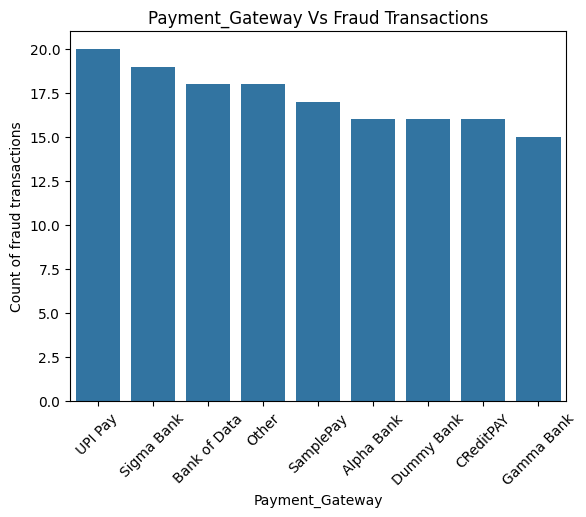

In [ ]:
#Comparing the fraudlent transactions with payment_gateway

fraud_df = df[df["fraud"]==1]
sorted_values=fraud_df.Payment_Gateway.value_counts()



sns.countplot(data=fraud_df,x="Payment_Gateway",order=sorted_values.index)
plt.xticks(rotation=45)
plt.xlabel("Payment_Gateway")
plt.ylabel("Count of fraud transactions")
plt.title("Payment_Gateway Vs Fraud Transactions")
plt.show()

**Observation**

    From the visual, it's clear that UPI Pay and Sigma Bank have the highest number of fraud transactions. Additionally, the previous visual indicated that these two payment gateways were also the most frequently used by customers.

In [ ]:
px.bar(x=df["Transaction_Type"].value_counts().index,
      y=df["Transaction_Type"].value_counts().values,
      color = df["Transaction_Type"].value_counts().index,
      labels={"x":"Transaction_type","y":"Count_of_transactions"}
      )


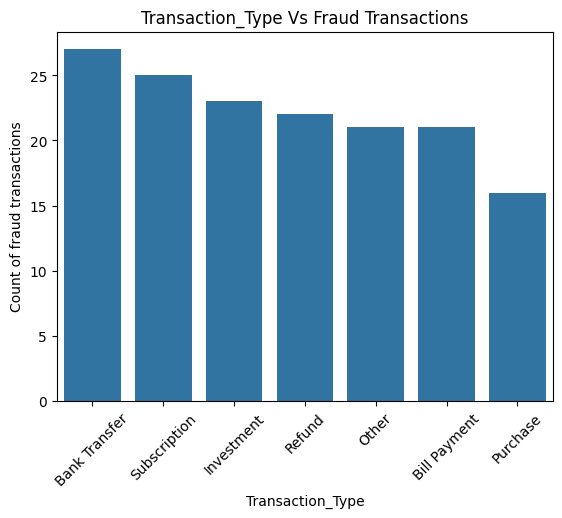

In [ ]:
#Comparing the fraudlent transactions with Transaction_type

fraud_df = df[df["fraud"]==1]
sorted_values=fraud_df.Transaction_Type.value_counts()



sns.countplot(data=fraud_df,x="Transaction_Type",order=sorted_values.index)
plt.xticks(rotation=45)
plt.xlabel("Transaction_Type")
plt.ylabel("Count of fraud transactions")
plt.title("Transaction_Type Vs Fraud Transactions")
plt.show()

In [ ]:
#Comparing the fraudlent transactions with Transaction_type

fraud_df = df[df["fraud"]==1]
sorted_values=fraud_df.Transaction_Type.value_counts()



fig = px.bar( x=sorted_values.index, y=sorted_values.values,
             color=sorted_values.index,
             labels={'x': 'Transaction_Type', 'y': 'Count of fraud transactions'},
             title='Transaction_Type Vs Fraud Transactions')
fig.show()

**Observation**

    From the visual, it's clear that Bank Transfer has the highest number of fraud transactions.

In [ ]:
#Checking for the top 10 cities for transactions
df.Transaction_City.value_counts().head(10)

,count
Transaction_City,
Bangalore,7
Bardhaman,7
Gorakhpur,6
Panipat,6
New Delhi,6
Vijayawada,5
Bareilly,5
Kirari Suleman Nagar,5
Jammu,5


In [ ]:
#Comparing the fraudlent transactions with Top 10 Cities

fraud_df = df[df["fraud"]==1]
sorted_values=fraud_df.Transaction_City.value_counts().head(10)



fig = px.bar( x=sorted_values.index, y=sorted_values.values,
             color=sorted_values.index,
             labels={'x': 'Transaction_City', 'y': 'Count of fraud transactions'},
             title='Transaction_City Vs Fraud Transactions')
fig.show()

**Observation**-

 Bangalore has the highest number of fraud transactions with a count of 3

In [ ]:
#Checking for the top 10 states for transactions
df.Transaction_State.value_counts().head(10)

,count
Transaction_State,
Mizoram,36
Kerala,31
Assam,30
Chhattisgarh,30
Manipur,30
Himachal Pradesh,27
Punjab,26
Andhra Pradesh,24
Nagaland,24


In [ ]:
#Comparing the fraudlent transactions with Top 10 Cities

fraud_df = df[df["fraud"]==1]
sorted_values=fraud_df.Transaction_State.value_counts().head(10)



fig = px.bar( x=sorted_values.index, y=sorted_values.values,
             color=sorted_values.index,
             labels={'x': 'Transaction_State', 'y': 'Count of fraud transactions'},
             title='Transaction_State Vs Fraud Transactions')
fig.show()

In [ ]:
#Dropping IP_Address
df.drop(columns=["IP_Address"],inplace=True)

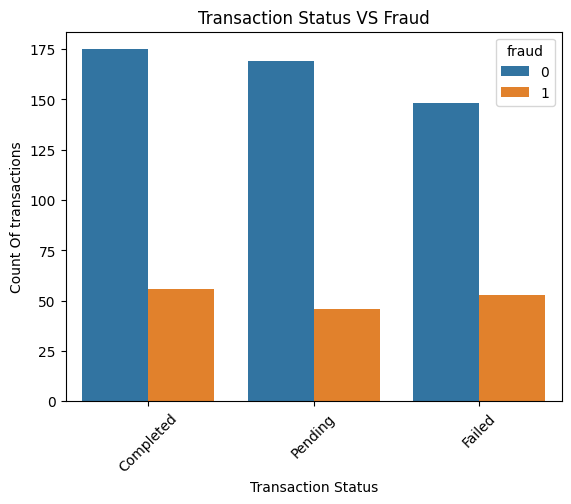

In [ ]:
#Exploring Transaction Status

sns.countplot(data=df,x="Transaction_Status",hue="fraud")
plt.xlabel("Transaction Status")
plt.ylabel("Count Of transactions")
plt.title("Transaction Status VS Fraud")
plt.xticks(rotation=45)
plt.show()

**Observation**

Completed status has most of the fraud transactions with a count of more than 50

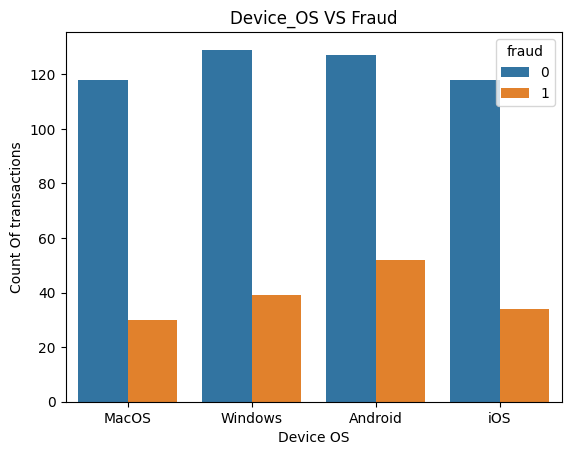

In [ ]:
#Exploring Device_OS

sns.countplot(data=df,x="Device_OS",hue="fraud")
plt.xlabel("Device OS")
plt.ylabel("Count Of transactions")
plt.title("Device_OS VS Fraud")
plt.show()

**Observation**

Android has the most transaction fraud whereas MACOS and iOS has the least fraudlent transactions

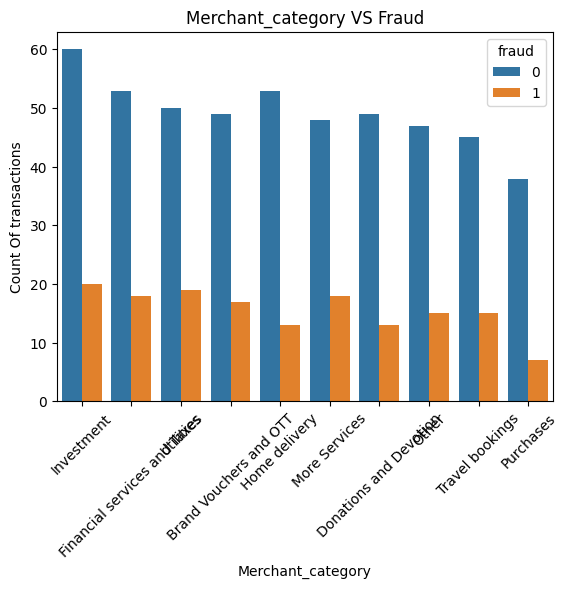

In [ ]:
#Exploring the merchant Category

sort_merchant_category = df["Merchant_Category"].value_counts()

sns.countplot(data=df,x="Merchant_Category",order=sort_merchant_category.index,hue="fraud")
plt.xlabel("Merchant_category")
plt.ylabel("Count Of transactions")
plt.title("Merchant_category VS Fraud")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Calculate the count of each Merchant_Category and sort them
sort_merchant_category = df["Merchant_Category"].value_counts()
# Create a bar plot with Plotly
fig = px.histogram(data_frame=df, x=df["Merchant_Category"].value_counts().index,
                  y=df["Merchant_Category"].value_counts().values,
                  color=df["Merchant_Category"].value_counts().index,
                  labels={"x":"Merchant_Category","y":"Count of Merchant_Category"},
                  title="Merchant_Category Count")


fig.show()

<Axes: xlabel='Transaction_Frequency', ylabel='Count'>

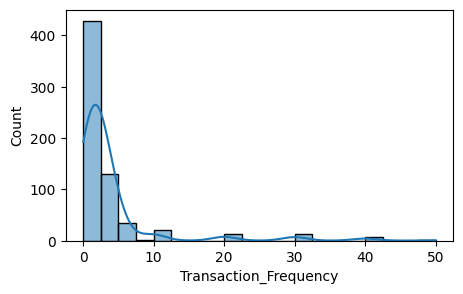

In [ ]:
plt.figure(figsize=(5,3))
sns.histplot(data=df,x="Transaction_Frequency",bins=20,kde=True)

**Observation**

Transaction Frequency less than 10 in a day

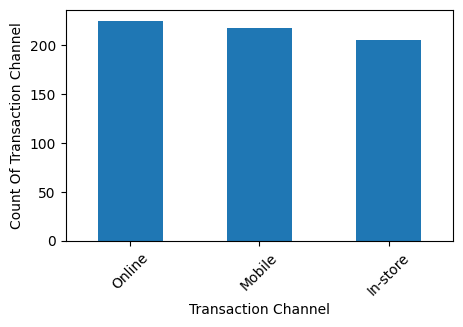

In [ ]:
#Exploring Transaction Channel

plt.figure(figsize=(5,3))
df["Transaction_Channel"].value_counts().plot(kind="bar")
plt.xlabel("Transaction Channel")
plt.ylabel("Count Of Transaction Channel")
plt.xticks(rotation=45)
plt.show()

**Observation**

Most transactions are online and mobile

In [ ]:
# Create a histogram for amount

fig = px.histogram( df, x='amount', nbins=10,
                   labels={'amount': 'Transaction Amount', 'count': 'Count'} )

# Update layout for better visualization

fig.update_layout( xaxis_title='Transaction Amount', yaxis_title='Count of Transactions' )

fig.show()

In [ ]:
# Create a bar plot with Plotly
fig = px.histogram(
    df,
    x='Year',
    color='fraud',
    barmode='group',
    title='Yearly Fraudulent vs Non-Fraudulent Transactions',
    labels={'Year': 'Year', 'count': 'Count', 'fraud': 'Fraud Status'}
)

# Update layout for better visualization
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Count of Transactions'
)

fig.show()


**Observation**

The year 2023 saw the highest incidence of fraud, with a total count of 109 fraudulent transactions. This significant spike highlights the importance of tightening security measures and monitoring activities in that particular year

In [ ]:
# Define the correct order for months
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


# Create a bar plot with Plotly
fig = px.histogram( df, x='Month',
                   color='fraud',
                   category_orders={'Month': month_order},
                   barmode='group',
                   title='Monthly Fraudulent vs Non-Fraudulent Transactions',
                   labels={'Month': 'Month', 'count': 'Count', 'fraud': 'Fraud Status'} )
# Update layout for better visualization
fig.update_layout( xaxis_title='Month', yaxis_title='Count of Transactions' )
fig.show()

**Observation**

January and June stand out with the highest incidences of fraud, recording 16 and 17 fraudulent transactions, respectively. This notable surge underscores the crucial need to enhance security measures and vigilant monitoring during these months.



# Dropping the unnecessary columns

In [ ]:
df.drop(columns=["Transaction_City","Device_OS","Transaction_Frequency","Transaction_Amount_Deviation",
               "Days_Since_Last_Transaction","Transaction_Status","Transaction_Channel"],inplace=True)

In [ ]:
df.shape

(647, 8)

# Encoding

In [ ]:
df1 = df.copy()

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Transaction_Type   647 non-null    object 
 1   Payment_Gateway    647 non-null    object 
 2   Transaction_State  647 non-null    object 
 3   Merchant_Category  647 non-null    object 
 4   amount             647 non-null    float64
 5   fraud              647 non-null    int64  
 6   Year               647 non-null    int32  
 7   Month              647 non-null    object 
dtypes: float64(1), int32(1), int64(1), object(5)
memory usage: 38.0+ KB


In [ ]:
#Converting year column to object
df1["Year"] = df1["Year"].astype("object")

In [ ]:
#Extracting categorical column from df1
categorical_cols = df1.select_dtypes(include="object").columns

In [ ]:
#Label Encoding for ordinal cols
from sklearn.preprocessing import LabelEncoder
cols = ["Year","Month"]
le = LabelEncoder()

for col in cols:
    df1[col] = le.fit_transform(df1[col])

In [ ]:
#Encoding the non ordinal Variables
non_ordinal = ["Transaction_Type","Payment_Gateway","Transaction_State","Merchant_Category"]

#Performing One-Hot encoding for the non ordinal variables
df1 = pd.get_dummies(data=df1,columns=non_ordinal,drop_first=True)

      amount  fraud  Year  Month  Transaction_Type_Bill Payment  \
0     396.62      1     0      0                          False   
1     121.94      1     0      1                          False   
2     106.69      1     0      6                          False   
3    3611.11      1     1      4                          False   
4     374.89      1     0      6                          False   
..       ...    ...   ...    ...                            ...   
642    28.27      0     0      5                           True   
643    26.26      0     0      5                          False   
644     6.02      0     0      0                           True   
645    17.12      0     0     10                          False   
646    50.60      0     1      0                          False   

     Transaction_Type_Investment  Transaction_Type_Other  \
0                          False                   False   
1                          False                   False   
2              

In [ ]:
#Converting the boolean data type if any into integer
df1 = df1.astype("int")

In [ ]:
df1.shape

(647, 54)

# Train Test Split and Scaling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
#Scaling

def preprocess_data(X):
    #Initialize the scaler
    sc = StandardScaler()

    #Fitting the X into it
    X_scaled = sc.fit_transform(X)
    return X_scaled

#Splitting the data into X and y
X = df1.drop(columns="fraud")
y = df1["fraud"]



In [ ]:
#preprocess the feature
X_scaled = preprocess_data(X)

In [ ]:
#Split the preprocessed data into the training set and Test Set
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=.2,random_state=42)

#Printing the output
print("Training feature shape: ",x_train.shape)
print("Testing feature shape: ",x_test.shape)
print("Training target feature shape: ",y_train.shape)
print("Testing target feature shape: ",y_test.shape)

Training feature shape:  (517, 53)
Testing feature shape:  (130, 53)
Training target feature shape:  (517,)
Testing target feature shape:  (130,)


# Model Performance before data balancing

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
#Split the preprocessed data into the training set and Test Set
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=.2,random_state=42,stratify=y)

In [ ]:
#Defining a function to evaluate a model and return a dictionary of metrics

def evaluate_model(model,x_test,y_test):

    #calculate predictions
    y_pred = model.predict(x_test)

    #Computing metrics
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    roc_auc = roc_auc_score(y_test,y_pred)

    #Returning results in a dictionary
    return {
        "Model":type(model).__name__,
         "Accuracy":accuracy,
        "Precision":precision,
         "Recall":recall,
        "F1_score":f1,
         "ROC_AUC":roc_auc
    }
#Defining the model
models = {
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting":GradientBoostingClassifier(),
    "XGboost":XGBClassifier()


}

#List to store the result
results = []




In [ ]:
#Model training Evaluation
for model_name, model in models.items():
    print(model_name + ":")
    model.fit(x_train,y_train)
    metrics = evaluate_model(model,x_test,y_test)
    results.append(metrics)

Decision Tree:
Random Forest:
Gradient Boosting:
XGboost:


In [ ]:
#Storing results in a dataframe
df_results = pd.DataFrame(results)
df_results

,Model,Accuracy,Precision,Recall,F1_score,ROC_AUC
0,DecisionTreeClassifier,0.907692,0.787879,0.838710,0.812500,0.884001
1,RandomForestClassifier,0.946154,0.852941,0.935484,0.892308,0.942489
2,GradientBoostingClassifier,0.946154,0.852941,0.935484,0.892308,0.942489
3,XGBClassifier,0.938462,0.848485,0.903226,0.875000,0.926360


# **Sampling Technique**

In [ ]:
# Oversampling using SMOTE as our data is imbalanced
from imblearn.over_sampling import SMOTE
X_res,y_res = SMOTE().fit_resample(X,y)
print(y_res.value_counts())

fraud
1    492
0    492
Name: count, dtype: int64


In [ ]:
#Splitting the resampled  data into the training set and Test Set
x_train, x_test, y_train,y_test = train_test_split(X_res,y_res,test_size=.2,random_state=42,stratify=y_res)

#Defining a function to evaluate a model and return a dictionary of metrics

def evaluate_model(model,x_test,y_test):

    #calculate predictions
    y_pred = model.predict(x_test)

    #Computing metrics
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    roc_auc = roc_auc_score(y_test,y_pred)

    #Returning results in a dictionary
    return {
        "Model":type(model).__name__,
         "Accuracy":accuracy,
        "Precision":precision,
         "Recall":recall,
        "F1_score":f1,
         "ROC_AUC":roc_auc
    }
#Defining the model
models = {
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting":GradientBoostingClassifier(),
    "XGboost":XGBClassifier()


}

#List to store the result
results = []

In [ ]:
#Model training Evaluation
for model_name, model in models.items():
    print(model_name + ":")
    model.fit(x_train,y_train)
    metrics = evaluate_model(model,x_test,y_test)
    results.append(metrics)

Decision Tree:
Random Forest:
Gradient Boosting:
XGboost:


In [ ]:
#Storing results in a dataframe
df_results = pd.DataFrame(results)
df_results

,Model,Accuracy,Precision,Recall,F1_score,ROC_AUC
0,DecisionTreeClassifier,0.898477,0.882353,0.918367,0.900000,0.898578
1,RandomForestClassifier,0.959391,0.959184,0.959184,0.959184,0.959390
2,GradientBoostingClassifier,0.944162,0.948454,0.938776,0.943590,0.944135
3,XGBClassifier,0.944162,0.939394,0.948980,0.944162,0.944187


# Random Forest has the highest F1 anD ROC_AUC score of 97% out of all the metrics. Hence This model will be used for UPI Fraud Detection


In [ ]:
import plotly.express as px

#Comparing the F1 score of all the models in descending order
df_sorted_results= df_results.sort_values(by="F1_score",ascending=False)

#Creating a bar graph using plotly
fig = px.bar(df_sorted_results, x='Model', y='F1_score',color="Model")

# Updating the layout
fig.update_layout( title="F1 Score of Models",
xaxis_title="Model",
yaxis_title="F1 Score",
xaxis={"categoryorder": "total descending"})
fig.show()

In [ ]:
# 📦 Save the trained Random Forest model and StandardScaler

import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Train the best model (if not already trained)
best_model = RandomForestClassifier()
best_model.fit(x_train, y_train)

# Save the model
joblib.dump(best_model, '/content/upi_fraud_rf_model.pkl')
print("✅ Random Forest model saved as 'upi_fraud_rf_model.pkl'")

# Save the scaler (assuming you used this for preprocessing)
scaler = StandardScaler()
scaler.fit(X)  # Fit on full data
joblib.dump(scaler, '/content/scaler.pkl')
print("✅ Scaler saved as 'scaler.pkl'")


joblib.dump(X.columns.tolist(), "model_columns.pkl")


✅ Random Forest model saved as 'upi_fraud_rf_model.pkl'
✅ Scaler saved as 'scaler.pkl'


['model_columns.pkl']

# Thus Random Forest can be used as a model to predict UPI Fraud detection

# Insights and Findings
**Data Imbalance**

The target variable shows significant imbalance, necessitating sampling techniques to improve model performance and ensure balanced predictions.

**Fraud Transaction Patterns**

Payment Gateways: UPI Pay and Sigma Bank account for the highest number of fraudulent transactions. These gateways also exhibit the highest overall customer usage, as per prior visual analysis.

Transaction Types: Bank Transfers and Subscriptions record the highest and second-highest numbers of fraudulent activities, respectively.

**Geographical Insights:**

Cities: Bangalore leads with the most fraudulent transactions among cities.
States: Kerala, Chhattisgarh, and Manipur register the highest fraud counts at the state level.

Transaction Status: The "Completed" status is associated with the majority of fraud cases, exceeding 50 transactions.

**Device Operating Systems:**

Android devices exhibit the highest number of fraudulent transactions.
Conversely, macOS and iOS record the lowest fraud incidences.
Frequency of Transactions: Fraudulent transaction frequency is right-skewed, with most users conducting fewer than 10 transactions per day.

Channels of Transactions: Fraudulent activities are predominantly conducted through online and mobile channels.

**Temporal Analysis**

Yearly Trend: The year 2023 witnessed the highest number of fraud cases, with 109 recorded incidents. This underscores the urgent need for enhanced security measures and rigorous monitoring.

Monthly Trend: January and June stand out as the months with the highest fraud counts (16 and 17, respectively). This highlights the importance of proactive fraud prevention measures during these peak months.

**Data Preprocessing**

The following columns were deemed unnecessary and removed for better model efficiency:


*   Transaction_City
*   Device_OS
*   Transaction_Amount_Deviation
*   Days_Since_Last_Transaction
*   Transaction_Status
*   Transaction_Channel

*   Date
*   Transaction_id
*   Time
*   Transaction_Frequency
*   Transaction_Amount_Deviation



**Model Performance**

Random Forest emerged as the most effective model for UPI fraud detection, achieving an F1 Score and ROC-AUC Score of 97%, outperforming other models across all evaluation metrics.


# **Conclusion**

Given its superior performance, the Random Forest model is recommended for UPI fraud detection. Its robustness and high predictive accuracy make it the optimal choice for identifying and mitigating fraudulent transactions.

no that's not what I meant, what I am saying is.
in a page, for example say a transaction page. user selects an option to do a upi transaction. in that user enters, amount, receivers upi id, name, and also senders upi id ( filled automatically ). after entering all these user clicks a button to start  or do transaction. it asks for a pin, in the meanwhile, we send this data ( user entered and other required data for model to predict (automatically) to check whether this is an fraud or not, if it is fraud, we say its a fraud, if it doesn't we continue the payment, store in the transaction history. update the senders and receivers balance.) got it?